In [1]:
# Extensions
%load_ext autoreload
%autoreload 2

In [135]:
# Imports
from word2vec import *
from core.search.query_paper_mag import paper_mag_multiquery
from core.search.query_info      import paper_info_mag_check_multiquery
from core.utils.entity_type      import Entity_type
from torch.utils.data            import DataLoader
import torch.optim as optim

DATA_LOC = 'test.dat'

In [3]:
# Get paper information

# Conf id
conf_id = 1127352206 #PLDI

# Generate papers for the conference
papers = paper_mag_multiquery(Entity_type.CONF, [conf_id])

print("Papers for conference:", len(papers))

# Import paper information here!
paper_informations = paper_info_mag_check_multiquery(papers)

return statue: 403
{'Ocp-Apim-Subscription-Key': '004967a3daac4bf683e16ca2a459de07'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': 'ce7734c51f504dcaa1dd89cb88fa153d'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': '9c0c0c5e7758484b9ed8092034eac796'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': 'aeea5a7bb8fd4d62af6c9c08b26521dc'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be reple

In [148]:
# Preprocess
preprocess = Preprocess(paper_informations)
preprocess.gen_pairs()
unigram = preprocess.gen_unigram()
preprocess.export_pairs(DATA_LOC)

In [150]:
# Get context corpus
corpus = ContextCorpus(DATA_LOC)
unigram_corpus = UnigramCorpus(unigram)
print(len(corpus))

85840


In [154]:
# SGNS model
embedding_size = len(preprocess.index)
embedding_dim  = 128
sgns = SGNS(embedding_size, embedding_dim)
print(sgns)

SGNS(
  (w_embedding): Embedding(2277, 128)
  (c_embedding): Embedding(2277, 128)
)


In [155]:
from tqdm import tqdm

BATCH_SIZE = 2000
ITERATIONS = 10
NUM_NEG    = 15
LEARN_RATE = 0.1 #0.025

optimizer = optim.Adagrad(sgns.parameters(), lr = LEARN_RATE)

num_batches = int(ITERATIONS * len(corpus) / BATCH_SIZE)

pos_dataloader = DataLoader(corpus, batch_size=BATCH_SIZE, shuffle=True)
w_neg_dataloader = DataLoader(unigram_corpus, batch_size=NUM_NEG, shuffle=True)
c_neg_dataloader = DataLoader(unigram_corpus, batch_size=NUM_NEG, shuffle=True)

pos_iter = iter(pos_dataloader)
w_neg_iter = iter(w_neg_dataloader)
c_neg_iter = iter(c_neg_dataloader)

progress_bar = tqdm(range(1, num_batches + 1))

for epoch in progress_bar:
    #pos_w, pos_c = pos_iter.next()
    #neg_w, neg_c = neg_iter.next()

    try:
        pos_w, pos_c = pos_iter.next()
    except StopIteration:
        pos_iter = iter(pos_dataloader)
        pos_w, pos_c = pos_iter.next()

    try:
        neg_w = w_neg_iter.next()
    except StopIteration:
        w_neg_iter = iter(w_neg_dataloader)
        neg_w = w_neg_iter.next()
        
    try:
        neg_c = c_neg_iter.next()
    except StopIteration:
        c_neg_iter = iter(c_neg_dataloader)
        neg_c = c_neg_iter.next()

    optimizer.zero_grad()
    loss = sgns.forward(pos_w, pos_c, neg_w, neg_c)
    loss.backward()
    optimizer.step()
    
    progress_bar.set_description("Loss: %0.8f, lr: %0.6f" % (loss.data.item(), optimizer.param_groups[0]['lr']))
    #print("Loss: %0.8f, lr: %0.6f" % (loss.data.item(), optimizer.param_groups[0]['lr']))
















  0%|          | 0/429 [00:00<?, ?it/s]














Loss: 10656.82617188, lr: 0.100000:   0%|          | 0/429 [00:00<?, ?it/s]














Loss: 10656.82617188, lr: 0.100000:   0%|          | 1/429 [00:00<01:09,  6.17it/s]














Loss: 8921.83886719, lr: 0.100000:   0%|          | 1/429 [00:00<02:26,  2.92it/s] 














Loss: 8921.83886719, lr: 0.100000:   0%|          | 2/429 [00:00<01:13,  5.79it/s]














Loss: 7827.33642578, lr: 0.100000:   0%|          | 2/429 [00:00<01:26,  4.95it/s]














Loss: 7592.69238281, lr: 0.100000:   0%|          | 2/429 [00:00<01:34,  4.50it/s]














Loss: 7592.69238281, lr: 0.100000:   1%|          | 4/429 [00:00<00:47,  8.95it/s]














Loss: 7013.22460938, lr: 0.100000:   1%|          | 4/429 [00:00<00:51,  8.24it/s]














Loss: 6295.77539062, lr: 0.100000:   1%|          | 4/429 [00:00<01:00,  7.00it/s]














Loss: 6295.77539062, lr: 0.100000:   1%|▏         | 6/429 [00:0

Loss: 1499.76147461, lr: 0.100000:   9%|▉         | 38/429 [00:02<00:25, 15.33it/s]














Loss: 1499.76147461, lr: 0.100000:  10%|▉         | 41/429 [00:02<00:23, 16.52it/s]














Loss: 1444.61633301, lr: 0.100000:  10%|▉         | 41/429 [00:02<00:23, 16.20it/s]














Loss: 1370.75830078, lr: 0.100000:  10%|▉         | 41/429 [00:02<00:24, 15.91it/s]














Loss: 558.72717285, lr: 0.100000:  10%|▉         | 41/429 [00:02<00:26, 14.79it/s] 














Loss: 558.72717285, lr: 0.100000:  10%|█         | 44/429 [00:02<00:24, 15.79it/s]














Loss: 705.38537598, lr: 0.100000:  10%|█         | 44/429 [00:02<00:24, 15.54it/s]














Loss: 667.34271240, lr: 0.100000:  10%|█         | 44/429 [00:02<00:25, 15.27it/s]














Loss: 667.34271240, lr: 0.100000:  11%|█         | 46/429 [00:02<00:24, 15.89it/s]














Loss: 603.15612793, lr: 0.100000:  11%|█         | 46/429 [00:02<00:24, 15.68it/s]














Loss: 727.86041260, lr: 0

Loss: 328.94982910, lr: 0.100000:  18%|█▊        | 77/429 [00:05<00:22, 15.34it/s]














Loss: 328.94982910, lr: 0.100000:  19%|█▊        | 80/429 [00:05<00:21, 15.93it/s]














Loss: 269.74670410, lr: 0.100000:  19%|█▊        | 80/429 [00:05<00:22, 15.80it/s]














Loss: 297.45642090, lr: 0.100000:  19%|█▊        | 80/429 [00:05<00:22, 15.69it/s]














Loss: 325.42913818, lr: 0.100000:  19%|█▊        | 80/429 [00:05<00:22, 15.53it/s]














Loss: 325.42913818, lr: 0.100000:  19%|█▉        | 83/429 [00:05<00:21, 16.11it/s]














Loss: 274.77047729, lr: 0.100000:  19%|█▉        | 83/429 [00:05<00:21, 15.94it/s]














Loss: 310.11474609, lr: 0.100000:  19%|█▉        | 83/429 [00:05<00:21, 15.80it/s]














Loss: 310.11474609, lr: 0.100000:  20%|█▉        | 85/429 [00:05<00:21, 16.18it/s]














Loss: 209.71273804, lr: 0.100000:  20%|█▉        | 85/429 [00:05<00:21, 16.04it/s]














Loss: 225.45004272, lr: 0.1000

Loss: 113.07279968, lr: 0.100000:  28%|██▊       | 119/429 [00:07<00:19, 15.76it/s]














Loss: 83.30536652, lr: 0.100000:  28%|██▊       | 119/429 [00:07<00:19, 15.62it/s] 














Loss: 117.27688599, lr: 0.100000:  28%|██▊       | 119/429 [00:07<00:20, 15.49it/s]














Loss: 117.27688599, lr: 0.100000:  28%|██▊       | 121/429 [00:07<00:19, 15.72it/s]














Loss: 118.56929016, lr: 0.100000:  28%|██▊       | 121/429 [00:07<00:19, 15.61it/s]














Loss: 124.55130005, lr: 0.100000:  28%|██▊       | 121/429 [00:07<00:19, 15.44it/s]














Loss: 124.55130005, lr: 0.100000:  29%|██▊       | 123/429 [00:07<00:19, 15.68it/s]














Loss: 116.18279266, lr: 0.100000:  29%|██▊       | 123/429 [00:07<00:19, 15.45it/s]














Loss: 83.76316071, lr: 0.100000:  29%|██▊       | 123/429 [00:08<00:20, 15.27it/s] 














Loss: 83.76316071, lr: 0.100000:  29%|██▉       | 125/429 [00:08<00:19, 15.51it/s]














Loss: 106.54150391, l

Loss: 49.35660553, lr: 0.100000:  37%|███▋      | 157/429 [00:10<00:17, 15.43it/s]














Loss: 49.35660553, lr: 0.100000:  37%|███▋      | 159/429 [00:10<00:17, 15.62it/s]














Loss: 72.98385620, lr: 0.100000:  37%|███▋      | 159/429 [00:10<00:17, 15.52it/s]














Loss: 62.82891083, lr: 0.100000:  37%|███▋      | 159/429 [00:10<00:17, 15.44it/s]














Loss: 62.82891083, lr: 0.100000:  38%|███▊      | 161/429 [00:10<00:17, 15.63it/s]














Loss: 42.26570511, lr: 0.100000:  38%|███▊      | 161/429 [00:10<00:17, 15.56it/s]














Loss: 76.95608521, lr: 0.100000:  38%|███▊      | 161/429 [00:10<00:17, 15.49it/s]














Loss: 50.47536469, lr: 0.100000:  38%|███▊      | 161/429 [00:10<00:17, 15.43it/s]














Loss: 50.47536469, lr: 0.100000:  38%|███▊      | 164/429 [00:10<00:16, 15.72it/s]














Loss: 39.82401276, lr: 0.100000:  38%|███▊      | 164/429 [00:10<00:16, 15.65it/s]














Loss: 92.60220337, lr: 0.10000

Loss: 30.14756584, lr: 0.100000:  46%|████▌     | 196/429 [00:12<00:14, 15.68it/s]














Loss: 30.14756584, lr: 0.100000:  46%|████▌     | 198/429 [00:12<00:14, 15.83it/s]














Loss: 45.38728333, lr: 0.100000:  46%|████▌     | 198/429 [00:12<00:14, 15.66it/s]














Loss: 120.83121490, lr: 0.100000:  46%|████▌     | 198/429 [00:12<00:14, 15.60it/s]














Loss: 120.83121490, lr: 0.100000:  47%|████▋     | 200/429 [00:12<00:14, 15.75it/s]














Loss: 31.77707672, lr: 0.100000:  47%|████▋     | 200/429 [00:12<00:14, 15.68it/s] 














Loss: 59.51730728, lr: 0.100000:  47%|████▋     | 200/429 [00:12<00:14, 15.62it/s]














Loss: 59.51730728, lr: 0.100000:  47%|████▋     | 202/429 [00:12<00:14, 15.76it/s]














Loss: 38.72914124, lr: 0.100000:  47%|████▋     | 202/429 [00:12<00:14, 15.70it/s]














Loss: 55.32929993, lr: 0.100000:  47%|████▋     | 202/429 [00:12<00:14, 15.65it/s]














Loss: 55.32929993, lr: 0.10

Loss: 26.56865883, lr: 0.100000:  55%|█████▌    | 236/429 [00:14<00:12, 15.80it/s]














Loss: 51.23769379, lr: 0.100000:  55%|█████▌    | 236/429 [00:14<00:12, 15.74it/s]














Loss: 19.97515488, lr: 0.100000:  55%|█████▌    | 236/429 [00:15<00:12, 15.67it/s]














Loss: 19.97515488, lr: 0.100000:  55%|█████▌    | 238/429 [00:15<00:12, 15.80it/s]














Loss: 19.63537216, lr: 0.100000:  55%|█████▌    | 238/429 [00:15<00:12, 15.74it/s]














Loss: 23.72313118, lr: 0.100000:  55%|█████▌    | 238/429 [00:15<00:12, 15.68it/s]














Loss: 23.72313118, lr: 0.100000:  56%|█████▌    | 240/429 [00:15<00:11, 15.81it/s]














Loss: 29.34072876, lr: 0.100000:  56%|█████▌    | 240/429 [00:15<00:11, 15.75it/s]














Loss: 43.02592087, lr: 0.100000:  56%|█████▌    | 240/429 [00:15<00:12, 15.69it/s]














Loss: 43.02592087, lr: 0.100000:  56%|█████▋    | 242/429 [00:15<00:11, 15.81it/s]














Loss: 28.39388466, lr: 0.10000

Loss: 20.41236496, lr: 0.100000:  64%|██████▎   | 273/429 [00:17<00:10, 15.57it/s]














Loss: 20.41236496, lr: 0.100000:  64%|██████▍   | 275/429 [00:17<00:09, 15.68it/s]














Loss: 38.51036835, lr: 0.100000:  64%|██████▍   | 275/429 [00:17<00:09, 15.63it/s]














Loss: 15.55469131, lr: 0.100000:  64%|██████▍   | 275/429 [00:17<00:09, 15.59it/s]














Loss: 15.55469131, lr: 0.100000:  65%|██████▍   | 277/429 [00:17<00:09, 15.70it/s]














Loss: 18.01226234, lr: 0.100000:  65%|██████▍   | 277/429 [00:17<00:09, 15.66it/s]














Loss: 20.76292801, lr: 0.100000:  65%|██████▍   | 277/429 [00:17<00:09, 15.63it/s]














Loss: 39.40270615, lr: 0.100000:  65%|██████▍   | 277/429 [00:17<00:09, 15.60it/s]














Loss: 39.40270615, lr: 0.100000:  65%|██████▌   | 280/429 [00:17<00:09, 15.76it/s]














Loss: 19.55038071, lr: 0.100000:  65%|██████▌   | 280/429 [00:17<00:09, 15.73it/s]














Loss: 25.61637497, lr: 0.10000

Loss: 17.56740379, lr: 0.100000:  73%|███████▎  | 314/429 [00:19<00:07, 16.02it/s]














Loss: 20.72910690, lr: 0.100000:  73%|███████▎  | 314/429 [00:19<00:07, 15.97it/s]














Loss: 20.72910690, lr: 0.100000:  74%|███████▍  | 317/429 [00:19<00:06, 16.12it/s]














Loss: 16.98673248, lr: 0.100000:  74%|███████▍  | 317/429 [00:19<00:06, 16.06it/s]














Loss: 18.75130081, lr: 0.100000:  74%|███████▍  | 317/429 [00:19<00:06, 16.01it/s]














Loss: 18.75130081, lr: 0.100000:  74%|███████▍  | 319/429 [00:19<00:06, 16.10it/s]














Loss: 19.36411667, lr: 0.100000:  74%|███████▍  | 319/429 [00:19<00:06, 16.06it/s]














Loss: 38.09756088, lr: 0.100000:  74%|███████▍  | 319/429 [00:19<00:06, 16.02it/s]














Loss: 38.09756088, lr: 0.100000:  75%|███████▍  | 321/429 [00:19<00:06, 16.11it/s]














Loss: 15.71858788, lr: 0.100000:  75%|███████▍  | 321/429 [00:19<00:06, 16.06it/s]














Loss: 15.96515274, lr: 0.10000

Loss: 17.35340500, lr: 0.100000:  82%|████████▏ | 353/429 [00:22<00:04, 15.92it/s]














Loss: 14.62052917, lr: 0.100000:  82%|████████▏ | 353/429 [00:22<00:04, 15.88it/s]














Loss: 14.62052917, lr: 0.100000:  83%|████████▎ | 355/429 [00:22<00:04, 15.96it/s]














Loss: 18.00497627, lr: 0.100000:  83%|████████▎ | 355/429 [00:22<00:04, 15.87it/s]














Loss: 48.98708725, lr: 0.100000:  83%|████████▎ | 355/429 [00:22<00:04, 15.75it/s]














Loss: 48.98708725, lr: 0.100000:  83%|████████▎ | 357/429 [00:22<00:04, 15.83it/s]














Loss: 18.08851242, lr: 0.100000:  83%|████████▎ | 357/429 [00:22<00:04, 15.77it/s]














Loss: 17.76858139, lr: 0.100000:  83%|████████▎ | 357/429 [00:22<00:04, 15.74it/s]














Loss: 17.76858139, lr: 0.100000:  84%|████████▎ | 359/429 [00:22<00:04, 15.82it/s]














Loss: 14.13508701, lr: 0.100000:  84%|████████▎ | 359/429 [00:22<00:04, 15.77it/s]














Loss: 32.79071426, lr: 0.10000

Loss: 28.18198586, lr: 0.100000:  91%|█████████ | 391/429 [00:25<00:02, 15.50it/s]














Loss: 14.51590347, lr: 0.100000:  91%|█████████ | 391/429 [00:25<00:02, 15.47it/s]














Loss: 14.51590347, lr: 0.100000:  92%|█████████▏| 393/429 [00:25<00:02, 15.54it/s]














Loss: 33.67681885, lr: 0.100000:  92%|█████████▏| 393/429 [00:25<00:02, 15.51it/s]














Loss: 14.50901604, lr: 0.100000:  92%|█████████▏| 393/429 [00:25<00:02, 15.48it/s]














Loss: 14.50901604, lr: 0.100000:  92%|█████████▏| 395/429 [00:25<00:02, 15.56it/s]














Loss: 18.58937645, lr: 0.100000:  92%|█████████▏| 395/429 [00:25<00:02, 15.51it/s]














Loss: 15.66802025, lr: 0.100000:  92%|█████████▏| 395/429 [00:25<00:02, 15.48it/s]














Loss: 15.66802025, lr: 0.100000:  93%|█████████▎| 397/429 [00:25<00:02, 15.55it/s]














Loss: 18.92660522, lr: 0.100000:  93%|█████████▎| 397/429 [00:25<00:02, 15.51it/s]














Loss: 13.15542984, lr: 0.10000

In [156]:
title1 = 'memsat checking axiomatic specifications of memory models'
title2 = 'mechanized verification of fine grained concurrent programs'

In [157]:
title_indices = list()
for word in title1.split():
    word_idx = preprocess.index[word]
    title_indices.append(word_idx)

title_vec = torch.sum(sgns.w_embedding(torch.LongTensor(title_indices)), 1)
print(title_vec.detach().numpy())

[  6.3911567  16.217619  -24.150126   -7.6213255   8.251906   15.60879
  -0.7425264]


In [158]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn           as sns

from research.models.utils    import *
from research.models.plotting import *

from research.data.gen_session_grouping import gen_sessions

sessions = gen_sessions()

In [159]:
pid2title = dict()
for paper_info in paper_informations:
    pid2title[paper_info['PaperId']] = paper_info['PaperTitle']

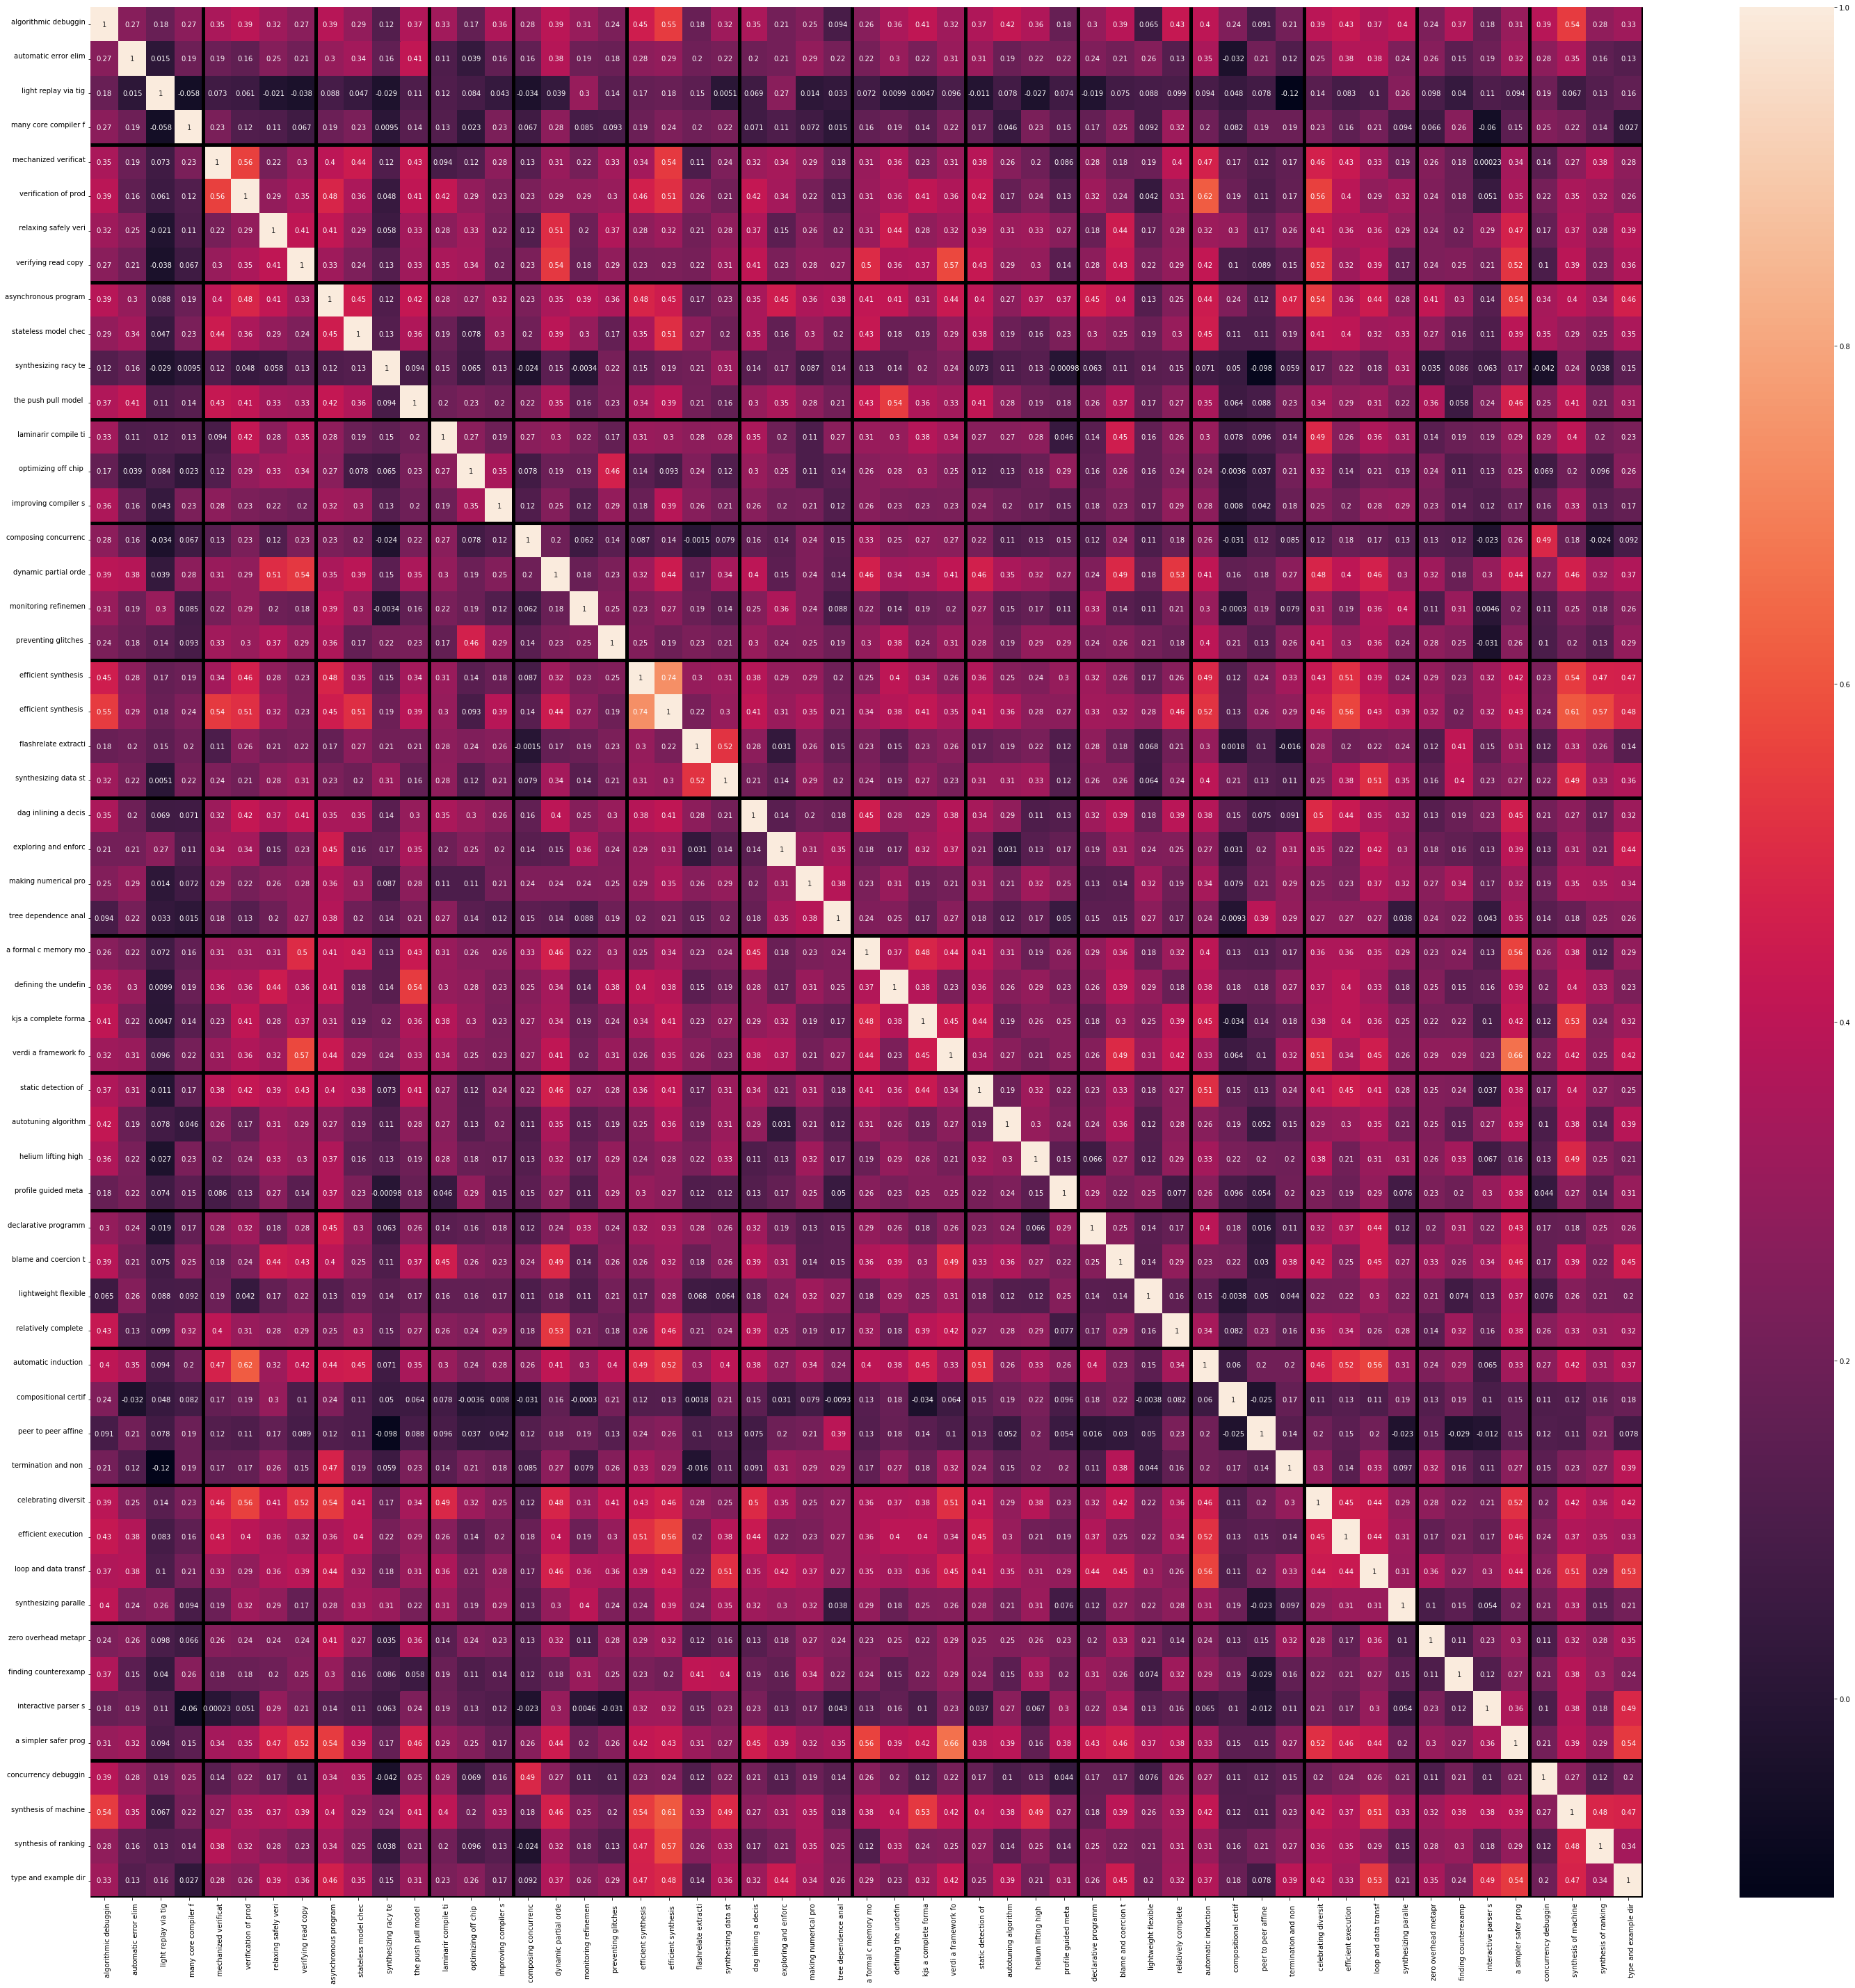

In [160]:
from functools import reduce

session_papers = reduce(lambda x, y: x + y, sessions)

auth_list   = list()
vec_list    = list()

for es_paper_id in session_papers:
    paper_title = pid2title[int(es_paper_id)]
    auth_list.append(paper_title[:20])
    title_indices = list()
    for word in paper_title.split():
        word_idx = preprocess.index[word]
        title_indices.append(word_idx)

    title_vec = torch.mean(sgns.w_embedding(torch.LongTensor(title_indices)), 0)
    vec_list.append(title_vec.detach().numpy())

fig, ax = plt.subplots(figsize=(50,50))     

sim_matrix = gen_cmp_matrix(vec_list)

ax=cmp_plot(sim_matrix, auth_list, plt)

# Separator lines
separator = np.cumsum([len(s) for s in sessions])
ax.hlines(separator, *ax.get_xlim(), linewidth=5)
ax.vlines(separator, *ax.get_ylim(), linewidth=5)

plt.show()

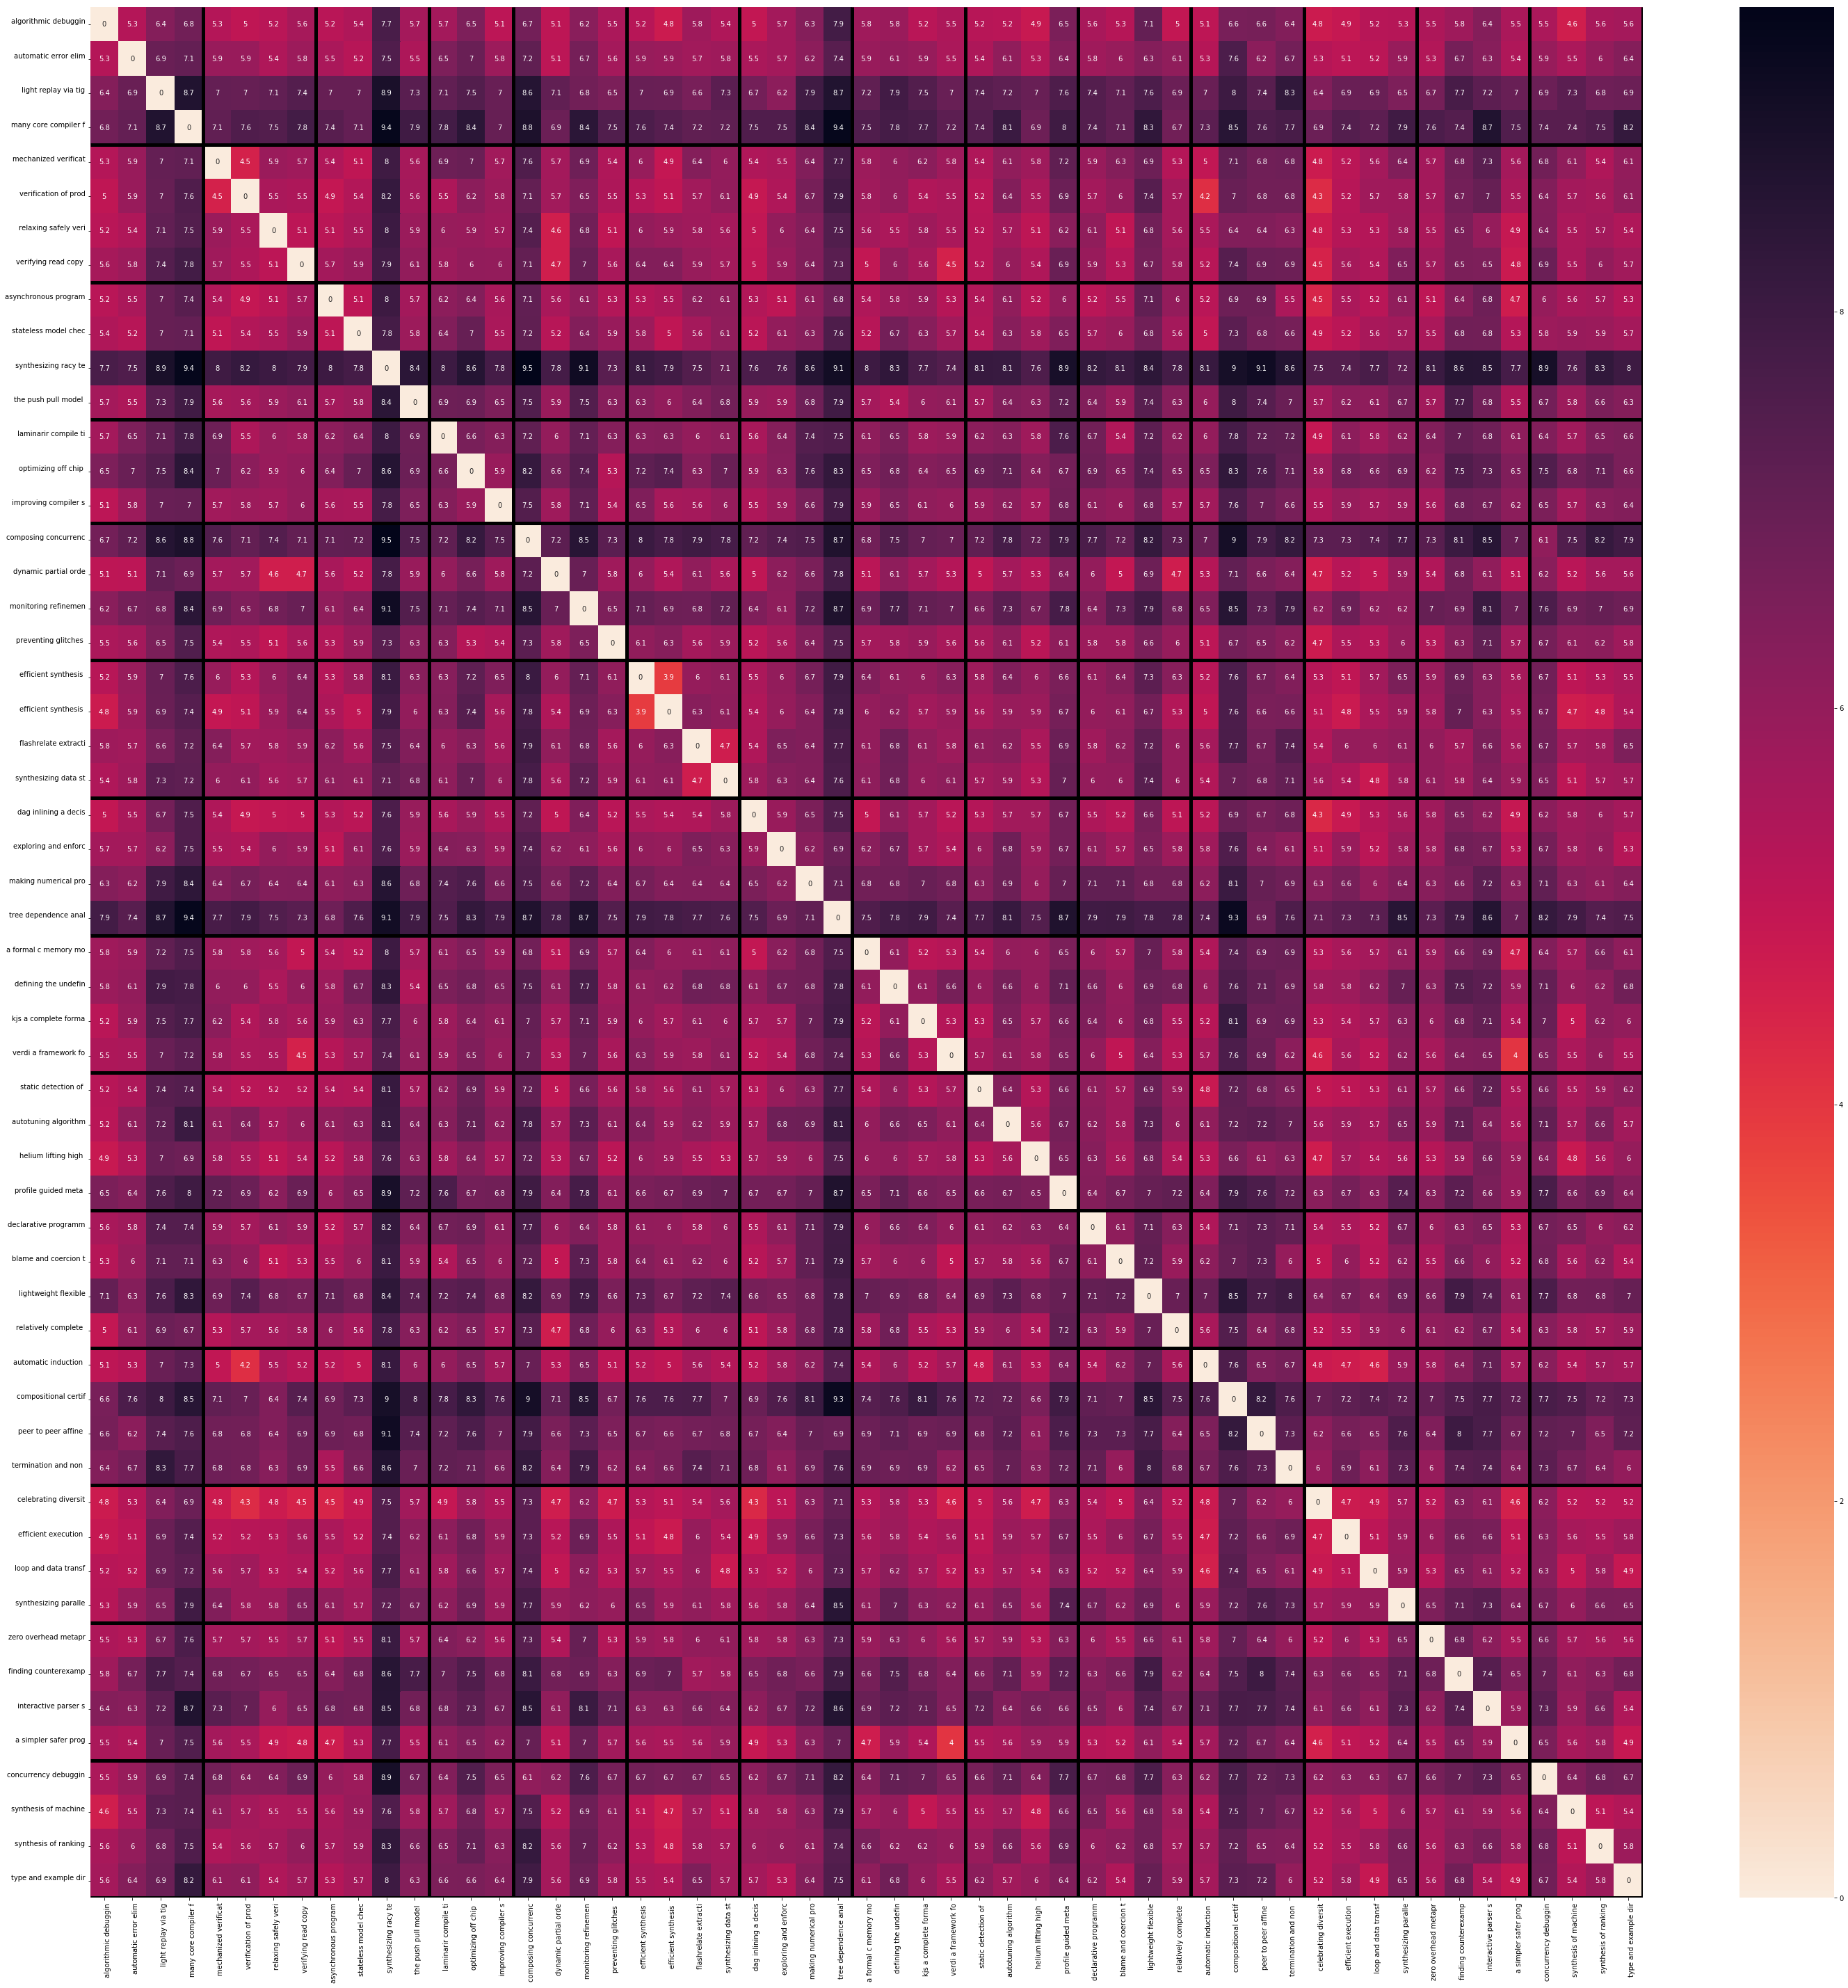

In [161]:
fig, ax = plt.subplots(figsize=(50,50))     

sim_matrix = gen_cmp_matrix(vec_list, calc=lambda x,y: np.linalg.norm(x-y))

ax=cmp_plot(sim_matrix, auth_list, plt, cmap=sns.cm.rocket_r)

# Separator lines
separator = np.cumsum([len(s) for s in sessions])
ax.hlines(separator, *ax.get_xlim(), linewidth=5)
ax.vlines(separator, *ax.get_ylim(), linewidth=5)

plt.show()